# Different techinques of training a model with Keras

## Import libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [110]:
import time

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Layer, InputLayer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import ReduceLROnPlateau

## Load Data

In [89]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [90]:
X_train.shape

(50000, 32, 32, 3)

In [91]:
y_train.shape

(50000, 1)

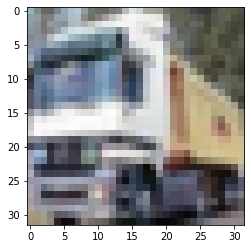

In [92]:
plt.imshow(X_train[1])

In [93]:
y_train[1]

array([9], dtype=uint8)

# Sequential API

### Number of classes

In [94]:
NUM_OUTPUTS = len(np.unique(y_train))
NUM_OUTPUTS

10

### Batch Size

In [95]:
BATCH_SIZE = 128

### Create Data Generator

In [56]:
train_dataset = ImageDataGenerator(rescale=1/255).flow(X_train, y_train, batch_size=BATCH_SIZE, shuffle=True)
test_dataset = ImageDataGenerator(rescale=1/255).flow(X_test, y_test, batch_size=BATCH_SIZE)

### Define Model 

In [55]:
cifar_model = Sequential()
cifar_model.add(Input(shape=(32,32,3)))
# CONV-LAYER1
cifar_model.add(Conv2D(64, kernel_size=(3,3)))
cifar_model.add(MaxPooling2D())
# CONV-LAYER2
cifar_model.add(Conv2D(64, kernel_size=(3,3)))
cifar_model.add(MaxPooling2D())
# CONV-LAYER3
cifar_model.add(Conv2D(64, kernel_size=(3,3)))
cifar_model.add(MaxPooling2D())

cifar_model.add(Flatten())
cifar_model.add(Dense(128, activation='relu'))
cifar_model.add(Dense(NUM_OUTPUTS, activation='softmax'))

cifar_model.compile(optimizer=Adam(lr=1e-3), metrics=['accuracy'], loss=['sparse_categorical_crossentropy'])
cifar_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 256)              

### Callbacks

In [56]:
reduce_lr = ReduceLROnPlateau(min_delta=1e-6)
callbacks = [reduce_lr]

### Train Model

In [57]:
EPOCHS = 10
STEPS_PER_EPOCHS = (X_train.shape[0] // BATCH_SIZE)

In [58]:
cifar_model.fit_generator(train_dataset, steps_per_epoch=STEPS_PER_EPOCHS, epochs=EPOCHS, validation_data=test_dataset, callbacks=callbacks)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 390 steps, validate for 79 steps
Epoch 1/10
390/390 [==============================] - 5s 14ms/step - loss: 1.5546 - accuracy: 0.4417 - val_loss: 1.3374 - val_accuracy: 0.5280
Epoch 2/10
390/390 [==============================] - 4s 11ms/step - loss: 1.1852 - accuracy: 0.5821 - val_loss: 1.1423 - val_accuracy: 0.6027
Epoch 3/10
390/390 [==============================] - 4s 11ms/step - loss: 1.0383 - accuracy: 0.6385 - val_loss: 1.0528 - val_accuracy: 0.6287
Epoch 4/10
390/390 [==============================] - 4s 11ms/step - loss: 0.9389 - accuracy: 0.6749 - val_loss: 0.9867 - val_accuracy: 0.6591
Epoch 5/10
390/390 [==============================] - 4s 11ms/step - loss: 0.8578 - accuracy: 0.7036 - val_loss: 0.9525 - val_accuracy: 0.6734
Epoch 6/10
390/390 [==============================] - 4s 11ms/step - loss: 0.7928 - accuracy: 0.7260 - val_loss: 0.9338 - val_accuracy: 0.6813
Epoch 7/10
390/390 [=============================

In [62]:
history = pd.DataFrame(cifar_model.history.history)
history

,loss,accuracy,val_loss,val_accuracy,lr
0,1.554650,0.441711,1.337397,0.5280,0.001
1,1.185113,0.582110,1.142296,0.6027,0.001
2,1.038157,0.638475,1.052839,0.6287,0.001
3,0.938937,0.674868,0.986747,0.6591,0.001
4,0.857871,0.703581,0.952451,0.6734,0.001
5,0.792761,0.726019,0.933841,0.6813,0.001
6,0.739096,0.745849,0.915372,0.6907,0.001
7,0.683533,0.764397,0.910145,0.6975,0.001
8,0.645228,0.779335,0.893034,0.7038,0.001
9,0.610365,0.789180,0.926364,0.7028,0.001


<AxesSubplot:>

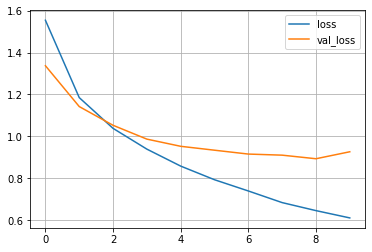

In [64]:
history[['loss', 'val_loss']].plot.line(grid=True)

<AxesSubplot:>

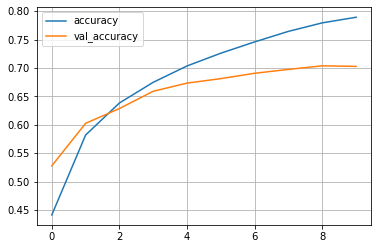

In [65]:
history[['accuracy', 'val_accuracy']].plot.line(grid=True)

### Save and Load Model

In [66]:
cifar_model.save('../models/cifar10_model.h5')

In [10]:
loaded_cifar_model = load_model('../models/cifar10_model.h5')

### Final Prediction

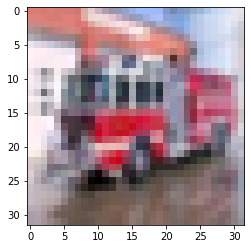

In [133]:
idx = np.random.randint(100)
test_image = X_test[idx]
plt.imshow(test_image)

In [134]:
label_dict = {0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

In [135]:
def get_prediction(img):
    img = np.expand_dims(img, 0)
    preds = loaded_cifar_model.predict(img)
    pred_arg = np.argmax(preds)
    label = label_dict[pred_arg]
    prob = np.max(preds) * 100
    return {'label': label, 'probability': prob}

In [37]:
get_prediction(test_image)

{'label': 'truck', 'probability': 100.0}

# Sub Classing Approach

### Create Tensorflow Dataset

In [96]:
def parse_data(img, label):
    img = tf.cast(img, tf.float32)
    img = img/255.0
    return img,label

In [97]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).map(parse_data).batch(BATCH_SIZE)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).map(parse_data).batch(BATCH_SIZE)

### Convolution Block

In [98]:
class ConvolutionLayer(Layer):
    
    def __init__(self, filters, kernel_size):
        super(ConvolutionLayer, self).__init__()
        self.__conv = Conv2D(filters, kernel_size, activation='relu')
        self.__max_pool = MaxPooling2D()
    
    def call(self, x):
        x = self.__conv(x)
        return self.__max_pool(x)

### Prediction Layer

In [99]:
class HeadLayer(Layer):
    
    def __init__(self, num_outputs):
        super(HeadLayer, self).__init__()
        self.__flatten = Flatten()
        self.__dense1 = Dense(128, activation='relu')
        self.__classifier = Dense(num_outputs, activation='softmax')
        
    def call(self, x):
        x = self.__flatten(x)
        x = self.__dense1(x)
        return self.__classifier(x)

### Define Model Class

In [100]:
class CifarModel(Model):
    
    def __init__(self, input_shape, filters, kernel_size, num_outputs):
        super(CifarModel, self).__init__()
        self.__input = InputLayer(input_shape=input_shape)
        self.__conv_layer_1 = ConvolutionLayer(filters, kernel_size)
        self.__conv_layer_2 = ConvolutionLayer(filters, kernel_size)
        self.__conv_layer_3 = ConvolutionLayer(filters, kernel_size)
        self.__classifier = HeadLayer(num_outputs)
        
    def call(self, x):
        x = self.__input(x)
        x = self.__conv_layer_1(x)
        x = self.__conv_layer_2(x)
        x = self.__conv_layer_3(x)
        return self.__classifier(x)

### Create Model Object

In [101]:
cifar_model = CifarModel(input_shape=(32,32,3), filters=64, kernel_size=(3,3), num_outputs=NUM_OUTPUTS)

In [114]:
EPOCHS = 10
TRAIN_STEPS_PER_EPOCHS = (X_train.shape[0] // BATCH_SIZE)
TEST_STEPS_PER_EPOCHS = (X_test.shape[0] // BATCH_SIZE)

In [152]:
adam = Adam(learning_rate=1e-3)
loss_object = SparseCategoricalCrossentropy(from_logits=False)

### Initialize Checkpoint Manager

In [153]:
checkpoint_path = "../models/ckpts/cifar_10/"
ckpt = tf.train.Checkpoint(cifar_model=cifar_model, optimizer=adam)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=1)

### Define Train/Test Function

In [154]:
@tf.function
def train_step(img, label):
    train_loss = 0
    with tf.GradientTape() as tape:
        pred = cifar_model(img)
        train_loss = loss_object(label, pred)
    avg_loss = (train_loss / int(label.shape[1]))
    trainable_variables = cifar_model.trainable_variables
    gradients = tape.gradient(train_loss, trainable_variables)
    adam.apply_gradients(zip(gradients, trainable_variables))
    return train_loss, avg_loss

In [155]:
@tf.function
def val_step(img, label):
    val_loss = 0
    pred = cifar_model(img)
    val_loss = loss_object(label, pred)
    avg_loss = (val_loss / int(label.shape[1]))
    return val_loss, avg_loss

In [156]:
def validation_loss(test_dataset):
    total_loss = 0
    for idx, (img, label) in enumerate(test_dataset):
        batch_loss, t_loss = val_step(img, label)
        total_loss += t_loss
    avg_test_loss = total_loss/TEST_STEPS_PER_EPOCHS
    return avg_test_loss

### Train Model

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Mangled names are not yet supported by AutoGraph
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Mangled names are not yet supported by AutoGraph
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Mangled names are not yet supported by AutoGraph
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Mangled names are not yet supported by AutoGraph
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and 

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Mangled names are not yet supported by AutoGraph
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Mangled names are not yet supported by AutoGraph
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Mangled names are not yet supported by AutoGraph
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Mangled names are not yet supported by AutoGraph
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and 

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Mangled names are not yet supported by AutoGraph
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Mangled names are not yet supported by AutoGraph
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Mangled names are not yet supported by AutoGraph
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Mangled names are not yet supported by AutoGraph
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and 

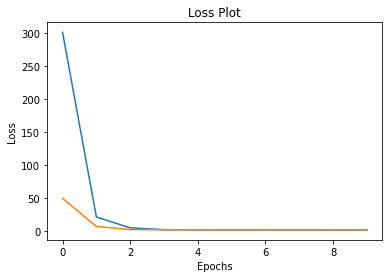

In [157]:
loss_plot = []
test_loss_plot = []

best_test_loss=100

for epoch in range(0, EPOCHS):
    start = time.time()
    total_loss = 0
    for (batch, (img_tensor, target)) in enumerate(train_dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss
            
    avg_train_loss = total_loss / TRAIN_STEPS_PER_EPOCHS
    loss_plot.append(avg_train_loss.numpy())    
    test_loss = validation_loss(test_dataset)
    test_loss_plot.append(test_loss.numpy())
    
    print ('For epoch: {}, the train loss is {:.3f}, & test loss is {:.3f}'.format(epoch+1,avg_train_loss,test_loss))
    print ('Time taken for 1 epoch {} sec\n'.format(time.time() - start))
    
    if test_loss < best_test_loss:
        print('Val loss has been reduced from %.3f to %.3f' % (best_test_loss, test_loss))
        best_test_loss = test_loss
        ckpt_manager.save()
        
plt.plot(loss_plot)
plt.plot(test_loss_plot)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.show()

In [158]:
path = ckpt_manager.latest_checkpoint
path

'../models/ckpts/cifar_10/ckpt-10'

### Restore saved checkpoint

In [159]:
restor_ckpt = tf.train.Checkpoint(cifar_model=cifar_model, optimizer=adam)
restor_ckpt.restore(path).assert_consumed()

### Getting a prediction

Real Label:  automobile


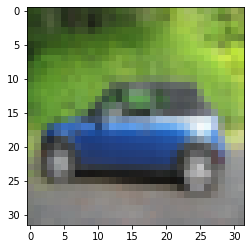

In [179]:
idx = np.random.randint(100)
test_image = X_test[idx]
real_label = y_test[idx]
print('Real Label: ', label_dict[real_label[0]])
plt.imshow(test_image)

In [180]:
def get_prediction(img):
    img = np.expand_dims(img, 0)
    preds = cifar_model.predict(img)
    pred_arg = np.argmax(preds)
    label = label_dict[pred_arg]
    prob = np.max(preds) * 100
    return {'label': label, 'probability': prob}

In [181]:
get_prediction(test_image)

{'label': 'automobile', 'probability': 100.0}